In [65]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
DATA_PATH = './data/card_transaction.v1.csv'

In [3]:
df = pd.read_csv(DATA_PATH)
df.rename(columns={"Errors?":"Errors", "Is Fraud?": "Fraud"}, inplace=True)

In [4]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors,Fraud
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [5]:
df.info(null_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   User            24386900 non-null  int64  
 1   Card            24386900 non-null  int64  
 2   Year            24386900 non-null  int64  
 3   Month           24386900 non-null  int64  
 4   Day             24386900 non-null  int64  
 5   Time            24386900 non-null  object 
 6   Amount          24386900 non-null  object 
 7   Use Chip        24386900 non-null  object 
 8   Merchant Name   24386900 non-null  int64  
 9   Merchant City   24386900 non-null  object 
 10  Merchant State  21666079 non-null  object 
 11  Zip             21508765 non-null  float64
 12  MCC             24386900 non-null  int64  
 13  Errors          388431 non-null    object 
 14  Fraud           24386900 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


## Casting dataset to decrease a size in RAM

In [6]:
df.User = df.User.astype(np.int16)
df.Card = df.Card.astype(np.int8)
df.Year = df.Year.astype(np.int16)
df.Month = df.Month.astype(np.int8)
df.Day = df.Day.astype(np.int8)
df.Amount = df.Amount.str.strip("$").astype(np.float32)
df.Zip = df.Zip.astype(np.float32)
df.MCC = df.MCC.astype(np.int16)
df.Errors = df.Errors.fillna("Empty")
df.Fraud = df.Fraud.map({"Yes":1, "No":0}).astype(np.int8)

In [7]:
df.info(null_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   User            24386900 non-null  int16  
 1   Card            24386900 non-null  int8   
 2   Year            24386900 non-null  int16  
 3   Month           24386900 non-null  int8   
 4   Day             24386900 non-null  int8   
 5   Time            24386900 non-null  object 
 6   Amount          24386900 non-null  float32
 7   Use Chip        24386900 non-null  object 
 8   Merchant Name   24386900 non-null  int64  
 9   Merchant City   24386900 non-null  object 
 10  Merchant State  21666079 non-null  object 
 11  Zip             21508765 non-null  float32
 12  MCC             24386900 non-null  int16  
 13  Errors          24386900 non-null  object 
 14  Fraud           24386900 non-null  int8   
dtypes: float32(2), int16(3), int64(1), int8(4), object(5)
memory usa

In [11]:
gc.collect()

311

## Descriptive statistics

In [15]:
df.isna().sum(axis=0)

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  0
Use Chip                0
Merchant Name           0
Merchant City           0
Merchant State    2720821
Zip               2878135
MCC                     0
Errors                  0
Fraud                   0
dtype: int64

In [16]:
df.nunique()

User                2000
Card                   9
Year                  30
Month                 12
Day                   31
Time                1440
Amount             98952
Use Chip               3
Merchant Name     100343
Merchant City      13429
Merchant State       223
Zip                27321
MCC                  109
Errors                24
Fraud                  2
dtype: int64

## Along features

#### Users

In [20]:
df.User.value_counts()

486     82355
396     80749
332     70010
262     68089
1249    65644
        ...  
457        25
231        21
1367       20
1767       16
1817       15
Name: User, Length: 2000, dtype: int64

In [34]:
df.groupby(by='User').Fraud.agg(['count', 'mean', 'sum']).sort_values(by='count', ascending=False)

,count,mean,sum
User,,,
486,82355,0.000607,50
396,80749,0.000111,9
332,70010,0.000243,17
262,68089,0.000896,61
1249,65644,0.000518,34
...,...,...,...
457,25,0.000000,0
231,21,0.000000,0
1367,20,0.000000,0


* Here is 2000 users with different number of observations for each user. Max observation number is 82355, min 15
* Among rare users almost no any fraud event detected

#### Cards

In [24]:
df.Card.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [25]:
df.Card.value_counts()

0    8696411
1    6493597
2    4305594
3    2790785
4    1309120
5     563097
6     176729
7      46383
8       5184
Name: Card, dtype: int64

In [35]:
df.groupby(by='Card').Fraud.agg(['count', 'mean', 'sum']).sort_values(by='count', ascending=False)

,count,mean,sum
Card,,,
0,8696411,0.000994,8644.0
1,6493597,0.001157,7514.0
2,4305594,0.001349,5807.0
3,2790785,0.001482,4135.0
4,1309120,0.001648,2157.0
5,563097,0.001804,1016.0
6,176729,0.001980,350.0
7,46383,0.002350,109.0
8,5184,0.004823,25.0


In [36]:
df.groupby(by=['User','Card']).Fraud.agg(['count', 'mean', 'sum']).sort_values(by='count', ascending=False)

,,count,mean,sum
User,Card,,,
396,1,70008,0.000100,7
1080,0,65325,0.000061,4
1888,0,53720,0.000168,9
1671,0,49261,0.000305,15
486,4,48278,0.000104,5
...,...,...,...,...
454,1,4,0.000000,0
511,5,3,0.000000,0
1283,2,2,0.000000,0


* Here is 9 different types of card. 
* Some users have several cards
* Fraud level is slightly increase with level of card

#### Year

In [56]:
np.sort(df.Year.unique())

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int16)

Year
1991       1585
1992       5134
1993       8378
1994      14316
1995      20928
1996      29945
1997      49753
1998      78345
1999     118250
2000     177729
2001     257998
2002     350732
2003     466408
2004     597003
2005     746653
2006     908793
2007    1064483
2008    1223460
2009    1355434
2010    1491225
2011    1570551
2012    1610829
2013    1650917
2014    1672343
2015    1701371
2016    1708924
2017    1723360
2018    1721615
2019    1723938
2020     336500
Name: User, dtype: int64

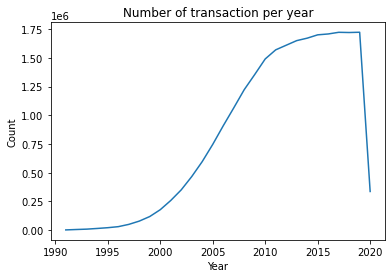

In [85]:
tmp = df.groupby(by=["Year"]).User.count()

plt.plot(tmp.index,tmp.values, label='count')
plt.title("Number of transaction per year")
plt.xlabel("Year")
plt.ylabel("Count")
tmp

1991      3
1992      2
1993      5
1994      8
1995      7
1996     17
1997     27
1998     38
1999     55
2000     61
2001     97
2002    112
2003    118
2004    138
2005    139
2006    140
2007    139
2008    131
2009     97
2010     89
2011     48
2012     26
2013     22
2014     19
2015     23
2016     15
2017     14
2018     16
2019     51
2020    343
Name: Year, dtype: int64

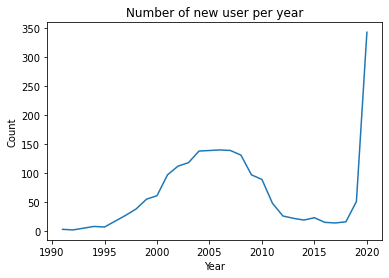

In [86]:
# Number of new users per Year
tmp = df.groupby(by='User').Year.min().value_counts().sort_index()

plt.plot(tmp.index,tmp.values, label='count')
plt.title("Number of new user per year")
plt.xlabel("Year")
plt.ylabel("Count")

tmp

In [91]:
tmp1=df.groupby(by='User').Year.min().value_counts().sort_index()
tmp2=df.groupby(by='Year').Fraud.sum().sort_index()
tmp3=df.groupby(by=["Year"]).User.count()
tmp = pd.DataFrame()
tmp['n_new_user'] = tmp1
tmp['n_fraud'] = tmp2
tmp['n_transaction'] = tmp3

In [94]:
tmp = tmp/tmp.max()

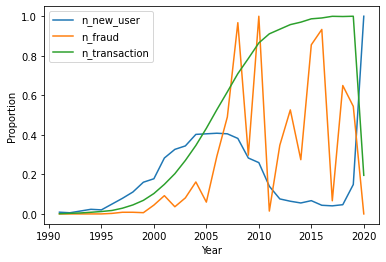

In [98]:
plt.plot(tmp.index,tmp.n_new_user.values, label='n_new_user')
plt.plot(tmp.index,tmp.n_fraud.values, label='n_fraud')
plt.plot(tmp.index,tmp.n_transaction.values, label='n_transaction')
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend();

* Here is data which take place since 1991 up to 2020
* Number of users in dataset increase to 2020 year. Last year is not full in data term
* More transaction - more fraud (Your Capitan :D)
* Since 2005 there is lot of fraud in data
* If number of new users drop - number of fraud drops also. Probably some people use face accounts to retrieve benefits